In [32]:
from tqdm import tqdm

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pprint as pp
pp = pp.PrettyPrinter(indent=4)

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler

from utils import *

In [33]:
X, Y = load_data()
X = X/255.0

(m, d) = X.shape
print(f'Input dimension:{d}, Total samples: {m}')

Input dimension:784, Total samples: 10000


In [26]:
seeds = [84, 128, 164, 256, 512]
trainSize = [.5, .6, .7, .8, .9]

mleDevScores = []
mleTestScores = []
knnDevScores = []
knnTestScores = []

for size in trainSize:
    print(f'\n\nProcessing for train size: {size*100}%')
    mle_dev_scores = []
    mle_test_scores = []
    knn_dev_scores = []
    knn_test_scores = []

    for seed in tqdm(seeds):
        X_dev, X_test, Y_dev, Y_test = train_test_split(X, Y, test_size=1-size, shuffle=True, stratify=Y, random_state=seed)
        
        mle = MLEClassifier()
        mle.fit(data=X_dev, labels=Y_dev)

        mle_dev_scores.append(mle.score(data=X_dev, true=Y_dev))
        mle_test_scores.append(mle.score(data=X_test, true=Y_test))
        
        sc = StandardScaler()
        # fit the scaler on train set
        sc.fit(X_dev)
        # transform the train set
        X_dev_sc = sc.transform(X_dev)
        # transform the val set
        X_test_sc = sc.transform(X_test)

        knn_l2 = KNNClassifier()
        knn_l2.fit(data=X_dev_sc, labels=Y_dev)

        knn_dev_scores.append(knn_l2.score(pMat=X_dev_sc, true=Y_dev, K=5, p=2))
        knn_test_scores.append(knn_l2.score(pMat=X_test_sc, true=Y_test, K=5, p=2))
    
    mleDevScores.append(np.mean(mle_dev_scores)) 
    mleTestScores.append(np.mean(mle_test_scores))
    knnDevScores.append(np.mean(knn_dev_scores))
    knnTestScores.append(np.mean(knn_test_scores))
    



Processing for train size: 50.0%


100%|██████████| 5/5 [02:47<00:00, 33.44s/it]




Processing for train size: 60.0%


100%|██████████| 5/5 [03:03<00:00, 36.72s/it]




Processing for train size: 70.0%


100%|██████████| 5/5 [03:19<00:00, 39.86s/it]




Processing for train size: 80.0%


100%|██████████| 5/5 [03:34<00:00, 42.84s/it]




Processing for train size: 90.0%


100%|██████████| 5/5 [03:44<00:00, 44.87s/it]


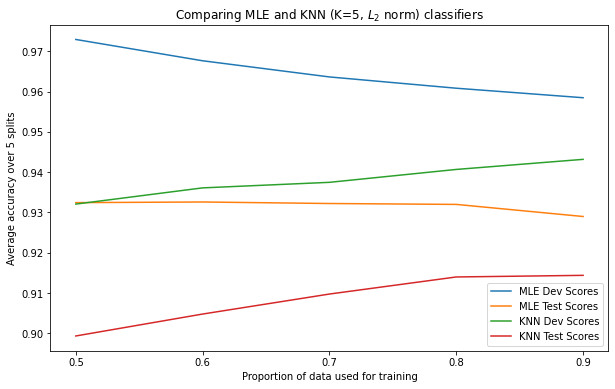

In [27]:
plt.figure(figsize=(10,6))

plt.plot(trainSize, mleDevScores, label='MLE Dev Scores')
plt.plot(trainSize, mleTestScores, label='MLE Test Scores')
plt.plot(trainSize, knnDevScores, label='KNN Dev Scores')
plt.plot(trainSize, knnTestScores, label='KNN Test Scores')

plt.xlabel('Proportion of data used for training')
plt.ylabel('Average accuracy over 5 splits')
plt.title('Comparing MLE and KNN (K=5, $L_2$ norm) classifiers')
plt.xticks(trainSize)
plt.legend()
plt.savefig('Comparison.png');

Let us tune the metric to be used in KNN for $K=5$

In [28]:
nSplits = 10
metrics = [1, 2, np.inf]

X_dev, X_test, Y_dev, Y_test = train_test_split(X, Y, test_size=.2, shuffle=True, stratify=Y, random_state=42)
skf = StratifiedKFold(n_splits=nSplits, shuffle=True, random_state=84)

curr_split = 0
splitTrainScores = []
splitValScores = []

for train_index, val_index in skf.split(X_dev, Y_dev):
    curr_split += 1 

    X_train = X_dev[train_index]
    Y_train = Y_dev[train_index]

    X_val = X_dev[val_index]
    Y_val = Y_dev[val_index]

    sc = StandardScaler()
    # fit the scaler on train set
    sc.fit(X_train)
    # transform the train set
    X_train_sc = sc.transform(X_train)
    # transform the val set
    X_val_sc = sc.transform(X_val)

    # Build the KNN Classifier on train set
    knn = KNNClassifier()
    knn.fit(data=X_train_sc, labels=Y_train)

    train_scores = []
    val_scores = []

    print(f'\n\nProcessing split:{curr_split}')
    for metric in tqdm(metrics):
        train_scores.append(knn.score(pMat=X_train_sc, true=Y_train, K=5, p=metric)) 
        val_scores.append(knn.score(pMat=X_val_sc, true=Y_val, K=5, p=metric))
   
    splitTrainScores.append(train_scores)
    splitValScores.append(val_scores)

splitTrainScores = np.array(splitTrainScores).T
splitValScores = np.array(splitValScores).T

avgTrainScores = np.mean(splitTrainScores, axis=1)
avgValScores = np.mean(splitValScores, axis=1)



Processing split:1


100%|██████████| 3/3 [01:08<00:00, 22.89s/it]




Processing split:2


100%|██████████| 3/3 [01:10<00:00, 23.65s/it]




Processing split:3


100%|██████████| 3/3 [01:06<00:00, 22.28s/it]




Processing split:4


100%|██████████| 3/3 [01:11<00:00, 23.78s/it]




Processing split:5


100%|██████████| 3/3 [01:08<00:00, 22.84s/it]




Processing split:6


100%|██████████| 3/3 [01:08<00:00, 22.76s/it]




Processing split:7


100%|██████████| 3/3 [01:08<00:00, 22.69s/it]




Processing split:8


100%|██████████| 3/3 [01:06<00:00, 22.17s/it]




Processing split:9


100%|██████████| 3/3 [01:11<00:00, 23.88s/it]




Processing split:10


100%|██████████| 3/3 [01:08<00:00, 22.82s/it]


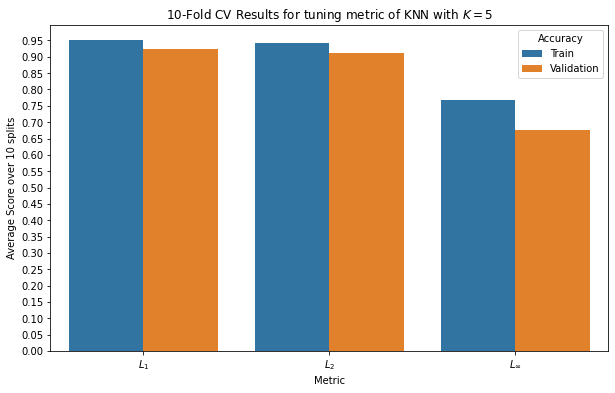

In [29]:
df = {'Metric': ['$L_1$', '$L_2$', '$L_\infty$']+['$L_1$', '$L_2$', '$L_\infty$'], 
      'Score': avgTrainScores.tolist()+avgValScores.tolist(), 
      'Accuracy': ['Train']*3+['Validation']*3}

df = pd.DataFrame(df)

plt.figure(figsize=(10,6))

sns.barplot(data=df, x='Metric', y='Score', hue='Accuracy')
plt.xlabel('Metric')
plt.ylabel('Average Score over 10 splits')
plt.yticks([.05*i for i in range(20)])
plt.title('10-Fold CV Results for tuning metric of KNN with $K=5$')
plt.savefig('Tuning metric.png');

In [30]:
print(f'L_1 - Avg Train Score: {avgTrainScores[0]:.3f}, Avg Validation Score:{avgValScores[0]:.3f}')
print(f'L_2 - Avg Train Score: {avgTrainScores[1]:.3f}, Avg Validation Score:{avgValScores[1]:.3f}')
print(f'L_inf - Avg Train Score: {avgTrainScores[2]:.3f}, Avg Validation Score:{avgValScores[2]:.3f}')


L_1 - Avg Train Score: 0.950, Avg Validation Score:0.924
L_2 - Avg Train Score: 0.941, Avg Validation Score:0.911
L_inf - Avg Train Score: 0.768, Avg Validation Score:0.675


We can see that KNN with $L_\infty$ norm performs significantly worse than the other metrics. Both $L_1$ and $L_2$ are comparable, however, $L_1$ wins by a small margin. 

We now evaluate their performance by training on the whole of development set and testing on the test set.

In [31]:
sc = StandardScaler()
# fit the scaler on train set
sc.fit(X_dev)
# transform the train set
X_dev_sc = sc.transform(X_dev)
# transform the val set
X_test_sc = sc.transform(X_test)


knn = KNNClassifier()
knn.fit(data=X_dev_sc, labels=Y_dev)

print(f'L_1 Test Accuracy: {knn.score(pMat=X_test_sc, true=Y_test, K=5, p=1)}')
print(f'L_2 Test Accuracy: {knn.score(pMat=X_test_sc, true=Y_test, K=5, p=2)}')
print(f'L_inf Test Accuracy: {knn.score(pMat=X_test_sc, true=Y_test, K=5, p=np.inf)}')

L_1 Test Accuracy: 0.922
L_2 Test Accuracy: 0.908
L_inf Test Accuracy: 0.689


Hence, we can go with $L_1$ as our metric for KNN classifier.

We can also tune both metric and $K$ simultaneously

In [34]:
nSplits = 10
metrics = [1, 2]
neighbors = [i+1 for i in range(20)]

X_dev, X_test, Y_dev, Y_test = train_test_split(X, Y, test_size=.2, shuffle=True, stratify=Y, random_state=42)
skf = StratifiedKFold(n_splits=nSplits, shuffle=True, random_state=84)

trainScores = {}
valScores = {}

for metric in metrics:
    print(f'\n\nProcessing neighbors for L_{metric} norm')
    for k in tqdm(neighbors):
        curr = 'metric:' + str(metric) + ' k:' + str(k)
        trainScores[curr] = []
        valScores[curr] = []
        
        for train_index, val_index in skf.split(X_dev, Y_dev):
            X_train = X_dev[train_index]
            Y_train = Y_dev[train_index]

            X_val = X_dev[val_index]
            Y_val = Y_dev[val_index]

            sc = StandardScaler()
            # fit the scaler on train set
            sc.fit(X_train)
            # transform the train set
            X_train_sc = sc.transform(X_train)
            # transform the val set
            X_val_sc = sc.transform(X_val)
            
            knn = KNNClassifier()
            knn.fit(data=X_train_sc, labels=Y_train)

            trainScores[curr].append(knn.score(pMat=X_train_sc, true=Y_train, K=k, p=metric))
            valScores[curr].append(knn.score(pMat=X_val_sc, true=Y_val, K=k, p=metric))
            



Processing neighbors for L_1 norm


100%|██████████| 20/20 [1:53:05<00:00, 339.29s/it]




Processing neighbors for L_2 norm


100%|██████████| 20/20 [18:49<00:00, 56.47s/it]


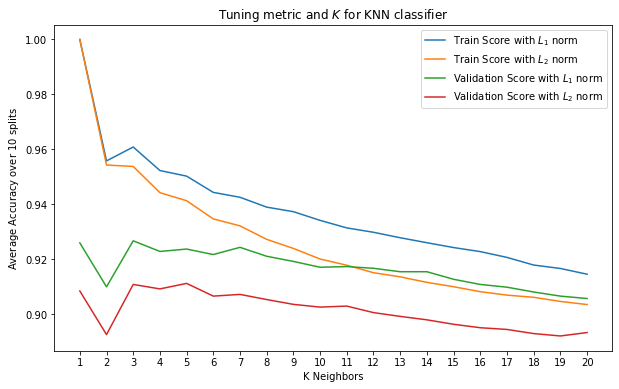

In [35]:
metric_key = [1 for _ in range(20)] + [2 for _ in range(20)]
k_key = [i+1 for i in range(20)] + [i+1 for i in range(20)]
scores = [np.mean(np.array(trainScores[f"metric:1 k:{i+1}"])) for i in range(20)] +  [np.mean(np.array(trainScores[f"metric:2 k:{i+1}"])) for i in range(20)] 
score_type = ['Train']*40 

metric_key = metric_key + metric_key
k_key = k_key + k_key
scores = scores + [np.mean(np.array(valScores[f"metric:1 k:{i+1}"])) for i in range(20)] +  [np.mean(np.array(valScores[f"metric:2 k:{i+1}"])) for i in range(20)] 
score_type = score_type + ['Val']*40 

d = {'Metric': metric_key, 'K': k_key, 'Score': scores, 'Accuracy': score_type}

df = pd.DataFrame(d)

plt.figure(figsize=(10,6))

sns.lineplot(data=df.loc[(df['Accuracy']=='Train') & (df['Metric']==1)], x='K', y='Score', label='Train Score with $L_1$ norm')
sns.lineplot(data=df.loc[(df['Accuracy']=='Train') & (df['Metric']==2)], x='K', y='Score', label='Train Score with $L_2$ norm')
sns.lineplot(data=df.loc[(df['Accuracy']=='Val') & (df['Metric']==1)], x='K', y='Score', label='Validation Score with $L_1$ norm')
sns.lineplot(data=df.loc[(df['Accuracy']=='Val') & (df['Metric']==2)], x='K', y='Score', label='Validation Score with $L_2$ norm')
plt.xlabel('K Neighbors')
plt.ylabel('Average Accuracy over $10$ splits')
plt.title('Tuning metric and $K$ for KNN classifier')
plt.xticks([i+1 for i in range(20)])
plt.legend()
plt.savefig('Final comparison.png');

We can see that $L_1$ with $K=7$ is the optimal combination of hyper-parameters

As a sanity check, we evaluate on the test dataset

In [36]:
sc = StandardScaler()
# fit the scaler on train set
sc.fit(X_dev)
# transform the train set
X_dev_sc = sc.transform(X_dev)
# transform the val set
X_test_sc = sc.transform(X_test)


knn_l2_5 = KNNClassifier()
knn_l2_5.fit(data=X_dev_sc, labels=Y_dev)

knn_l1_7 = KNNClassifier()
knn_l1_7.fit(data=X_dev_sc, labels=Y_dev)

print(f'L_2 with K=5 Test Accuracy: {knn_l2_5.score(pMat=X_test_sc, true=Y_test, K=5, p=2)}')
print(f'L_1 with K=7 Test Accuracy: {knn_l1_7.score(pMat=X_test_sc, true=Y_test, K=7, p=1)}')


L_2 with K=5 Test Accuracy: 0.908
L_1 with K=7 Test Accuracy: 0.9235
